<center><b>Radioactive Decay Chains and the Bateman Equation</b></center>

<center>Part II Particle & Nuclear Physics</center>

Many radioactive decay chains exist in nature and relative abundances of substances within these chains can be used to the date the object. E.g. Uranium-238 decay chain:

<img src="https://geoinfo.nmt.edu/resources/uranium/images/decaychain.jpg"  style="width:400px;height:281px;">

For these chains, the ith isotope obeys the following decay rate equation:

<center>$ \frac{d N_i}{dt} = -\lambda_i N_i + \lambda_{i-1}N_{i-1} $</center>

The process above in the chain produces it at a rate $\lambda_{i-1}N_{i-1}$ as it decays at a rate $\lambda_i N_i$. The general solution to this set of equations is the Bateman equation.

In [1]:
import numpy as np
import matplotlib.pyplot as plt

%matplotlib notebook

from IPython.display import display
import ipywidgets as widgets
from ipywidgets import interact, FloatSlider, IntSlider, fixed

Decay_cycle: This function takes in the number of time steps (N_t), the total number of nuclei (N), the number of links in decay chain (N_d), an array containing the probability that each daughter nucleii will decay (P) and the initial data array (data).

It then cycles through the time, nuclei and decay links comparing a array of random numbers between 0 and 1 (rand) to the probability of decay of a given nucleus. If the random number is less than the decay probability then the decay occurs and the nucleus moves along one step in the decay chain.

In [2]:
def decay_cycle(N_t,N,N_d,P,data):
	for i in range(1,N_t+1):
		rand = np.random.rand(N)
		for j in range(N):
			for k in range(N_d):
				if rand[j] < P[k]:
					if data[j,i] == k:                    
						data[j,i:] = data[j,i:] + 1.0
						break
	return data

Counter: This function counts the number of each type of nucleus of the total N nuclei at a given time step. E.g. if there are 3 type 0 nuclei at t = 0 and 2 type 0 and 1 type 1 at t = 1 then counter will return [3,0,...] and [2,1,...] respectively.

In [3]:
def counter(N_t,N_d,data):
	# Counted nucleii
	count = np.zeros((N_d,N_t+1))
	for i in range(N_d):
		count[i,:] = np.sum(data.astype('int64') == i,axis = 0)
	return count

Creates and initialises parameters for a chain containing four decays of N nuclei

In [4]:
global N,N_t,P

# Number of nucleii
N = 10000

# Number of daughters in chain
N_d = 4

# Probability of each decay
P = np.zeros((N_d))
P[0] = 0.25
P[1] = 0.025
P[2] = 0.075
P[3] = 0.001

# Number of time steps
N_t = 25

This section contains plotting and widget elements for controlling the input parameters.

<IPython.core.display.Javascript object>


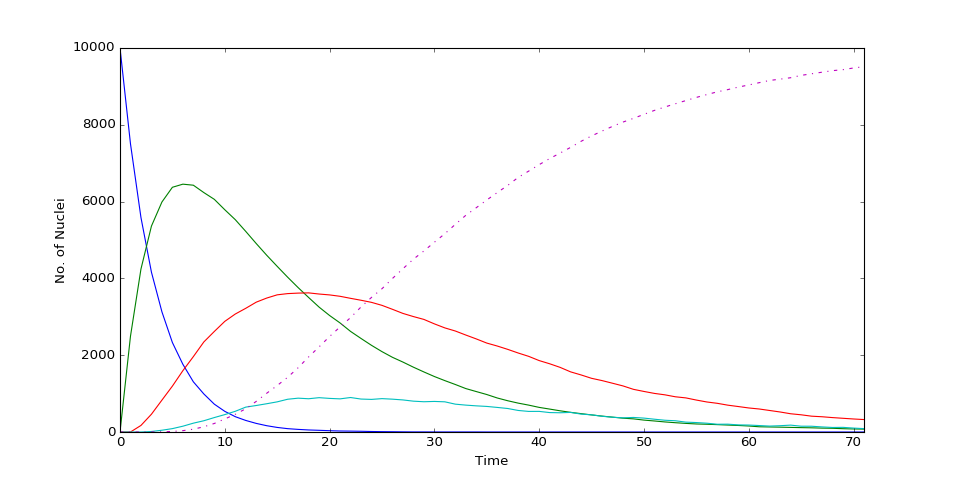

In [8]:
# Initialise plot
line_array = []
fig = plt.figure(figsize = (12,6))
ax = plt.subplot(111)
for i in range(N_d):
    line, = ax.plot([],[])
    line_array.append(line)
line, = ax.plot([],[],'-.')
line_array.append(line)
ax.set_ylabel('No. of Nuclei')
ax.set_xlabel('Time')

def update(event):
    # Data record array
    initial_state = np.zeros((N,N_t+1))

    data = decay_cycle(N_t,N,N_d,P,initial_state)

    count = counter(N_t,N_d,data)

    time = np.arange(0,N_t+1)
    stable = np.sum(count, axis = 0)
    for i in range(N_d):
        line_array[i].set_data(time,count[i,:])
    line_array[N_d].set_data(time,N-stable)
    ax.set_xlim([0,time[N_t]])
    ax.set_ylim([0,N])

def N_update(val):
    global N
    N = val
    display(fig)

def N_t_update(val):
    global N_t
    N_t = val
    display(fig)

def prob_update(val,i):
    global P
    P[i] = val
    display(fig)

widgets.interact(N_update,val = IntSlider(min=10, max=100000, step=1, value=N, description='Number of Nucleii'))
widgets.interact(N_t_update,val = IntSlider(min=1, max=250, step=1, value=N_t, description='Number of Time Steps'))

def prob_widget(val,name,rank):
    widgets.interact(prob_update,val = FloatSlider(min=0., max=1., step=0.001, value=val, description=name), i=fixed(rank))

prob_widg_list = ['Primary Decay Prob','Secondary Decay Prob','Tertiary Decay Prob','Quaternary Decay Prob']

for i in range(N_d):
    prob_widget(P[i],prob_widg_list[i],i)

run_button = widgets.Button(description="Run")
display(run_button)
run_button.on_click(update)

In the graph above, blue represents the number of nuclei which are first in the chain (these perform a simple exponential decay). Green is second in the chain, Red third and Cyan fourth. Finally the dashed line represents the amount of stable species produced by the fourth and final decay. This tends to N at long times.